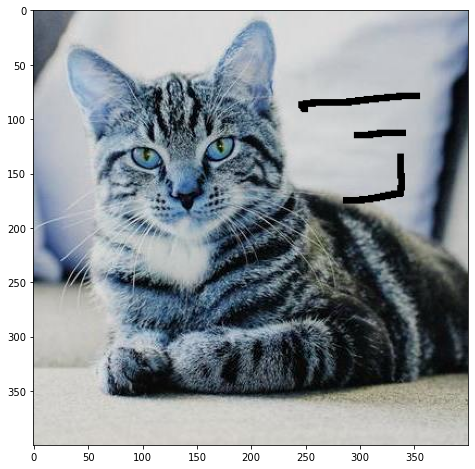

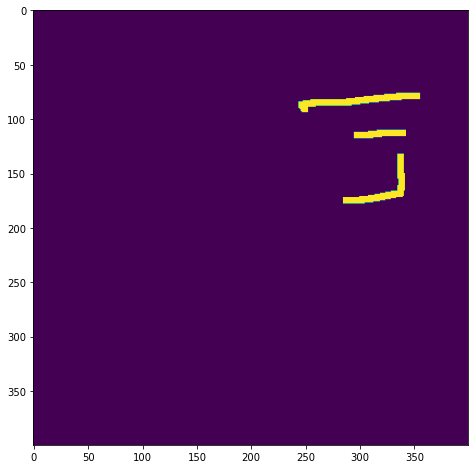

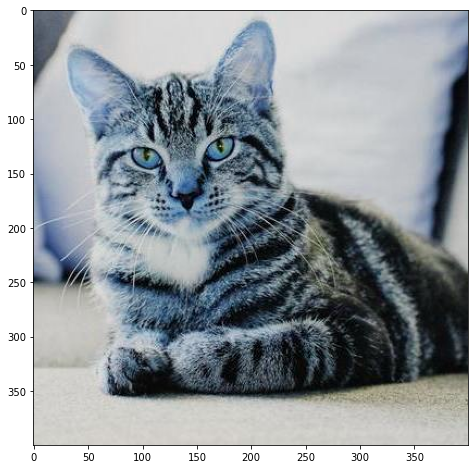

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#open an image
img = cv2.imread('im1.png')
plt.imshow(img)
plt.show()
#load the mask
mask = cv2.imread('im2.png',0)
plt.imshow(mask)
plt.show()
#inpaint
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)
#write the output
cv2.imwrite('dimage_inpainted.png',dst)
plt.imshow(dst)
plt.show()   

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(10,8)

In [41]:
def show_image(image,title='image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original,img_filtered,img_title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8), sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

In [42]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

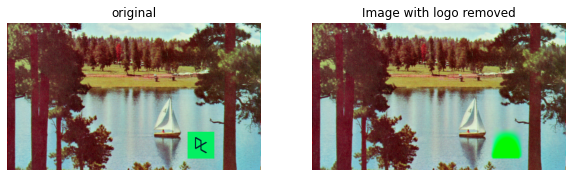

In [43]:
image_with_logo=plt.imread('imlogo.png')

#initialize the mask
mask=np.zeros(image_with_logo.shape[:-1])

#set the pixels where the logo is at 1
mask[210:272,360:425]=1

#apply inpainting to remove the logo
image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,mask,multichannel=True)

#show the original and logo removed images
plot_comparision(image_with_logo,image_logo_removed,'Image with logo removed')



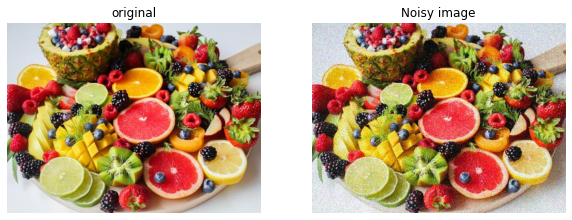

In [44]:
#noise
#removing noise
from skimage.util import random_noise
fruit_image=plt.imread('fruit.jpeg')

#add noise to the image
noisy_image=random_noise(fruit_image)

#show the original and resulting image
plot_comparison(fruit_image, noisy_image, 'Noisy image')

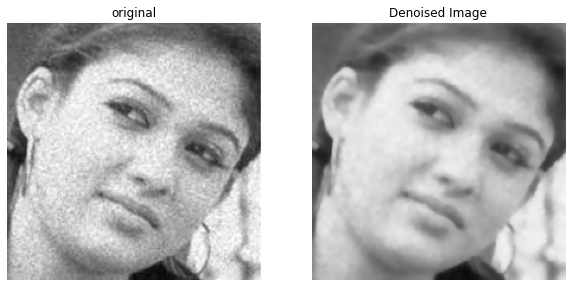

In [45]:
#reducing noise

from skimage.restoration import denoise_tv_chambolle

noisy_image=plt.imread('nayan.jpg')

#apply total variation filter denoising
denoised_image=denoise_tv_chambolle(noisy_image,multichannel='True')

#show the noisy and denoised image
plot_comparison(noisy_image, denoised_image, 'Denoised Image')


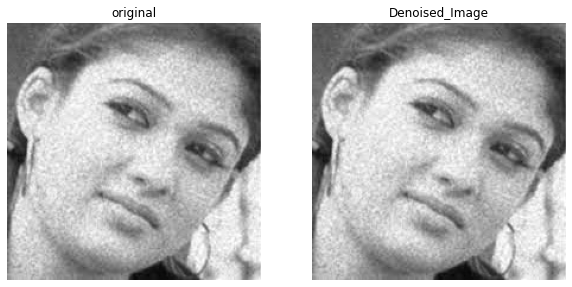

In [47]:
#reducing noise while preserving edges

from skimage.restoration import denoise_bilateral
landscape_image=plt.imread('nayan.jpg')

#apply bilateral filter denoising
denoised_image=denoise_bilateral(landscape_image,multichannel=True)

#show the original and resulting image
plot_comparison(landscape_image, denoised_image, 'Denoised_Image')

<ipython-input-49-5ed1a78548fe>:9: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments=slic(face_image, n_segments=400)
<ipython-input-49-5ed1a78548fe>:12: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image=label2rgb(segments, face_image, kind='avg')


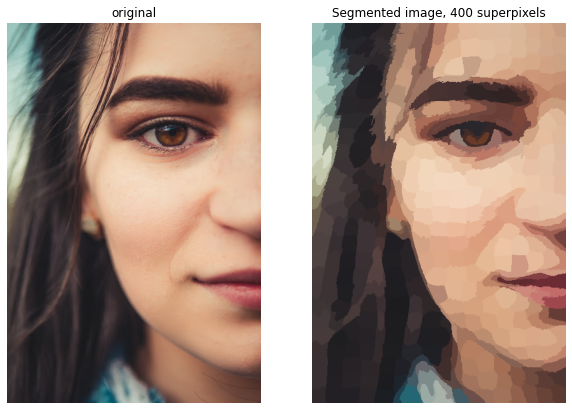

In [49]:
#segmentation

#super pixel segmentation
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image=plt.imread('eye.jpg')

#obtain the segmentation with 400 regions
segments=slic(face_image, n_segments=400)

#put segments on top of the original image to compare
segmented_image=label2rgb(segments, face_image, kind='avg')

#show the segmented image
plot_comparison(face_image,segmented_image, 'Segmented image, 400 superpixels')


In [50]:
#contours
#a)contouring shapes

def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:,1],contour[:,0], linewidth=3)
        plt.imshow(image, interpolation='nearest', cmap='gray_r')
        plt.title('contours')
        plt.axis('off')


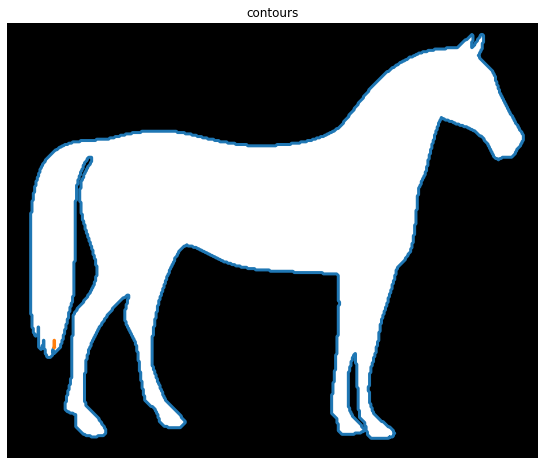

In [51]:
from skimage import measure, data

#obtain the horse image
horse_image=data.horse()

#find the contours with a constant level value of 0.8
contours=measure.find_contours(horse_image, level=0.8)

#show the image with contours found
show_image_contour(horse_image, contours)

<ipython-input-55-6999a5d4c5a4>:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image_dices=color.rgb2gray(image_dices)


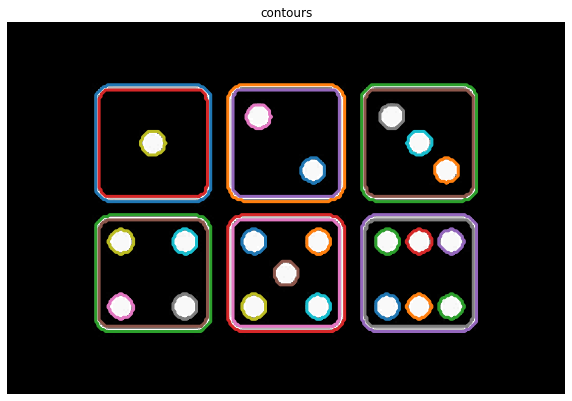

In [55]:
#find the contour of image that is not binary

from skimage.io import imread
from skimage.filters import threshold_otsu

image_dices=imread('ludo.png')

#make the image grayscale
image_dices=color.rgb2gray(image_dices)

#obtain the optimal thresh value
thresh=threshold_otsu(image_dices)

#apply thrsholding
binary=image_dices > thresh

#find contors at a constant value 0.8
contours=measure.find_contours(binary, level=0.8)

#show the image
show_image_contour(image_dices, contours)


Dice`s dots number: 21.


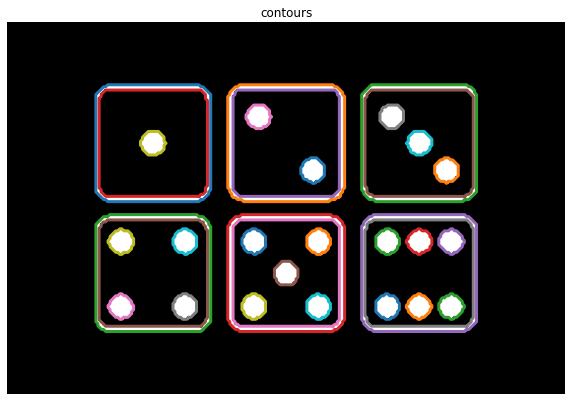

In [57]:
#count the dots in dices image

#create list with shape of each contour
shape_contours=[cnt.shape[0] for cnt in contours]

#set 50 as the maximum size of the dots shape
max_dots_shape=50

#count dots in contours excluding bigger than dots size
dots_contours=[cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

#show all contour found
show_image_contour(binary, contours)

#print the dices number
print('Dice`s dots number: {}.'.format(len(dots_contours)))